In [ ]:
import pandas as pd

In [ ]:
# Load the dataset from your local file path
file_path = r"C:\Users\emman\Downloads\archive (12)\StudentsPerformance.csv" # This line is commented out as it's a local path
df = pd.read_csv("/content/sample_data/StudentsPerformance.csv")

In [ ]:
# Display the first few rows
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [ ]:
# One-Hot Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
# View encoded DataFrame
print(df_encoded.head())

   math score  reading score  writing score  gender_male  \
0          72             72             74        False   
1          69             90             88        False   
2          90             95             93        False   
3          47             57             44         True   
4          76             78             75         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   False                    True                   False   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                   False                                           True   
1                   Fals

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Math Score Distribution')

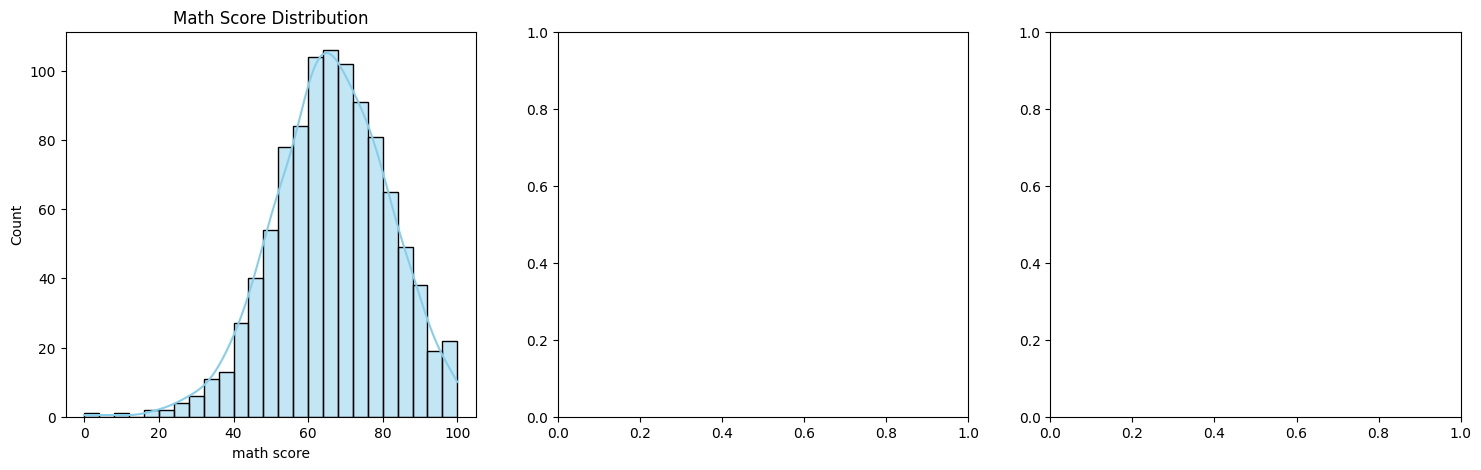

In [ ]:
# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['math score'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Math Score Distribution')

In [ ]:
sns.histplot(df['reading score'], kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Reading Score Distribution')

Text(0.5, 1.0, 'Reading Score Distribution')

In [ ]:
sns.histplot(df['writing score'], kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Writing Score Distribution')

Text(0.5, 1.0, 'Writing Score Distribution')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

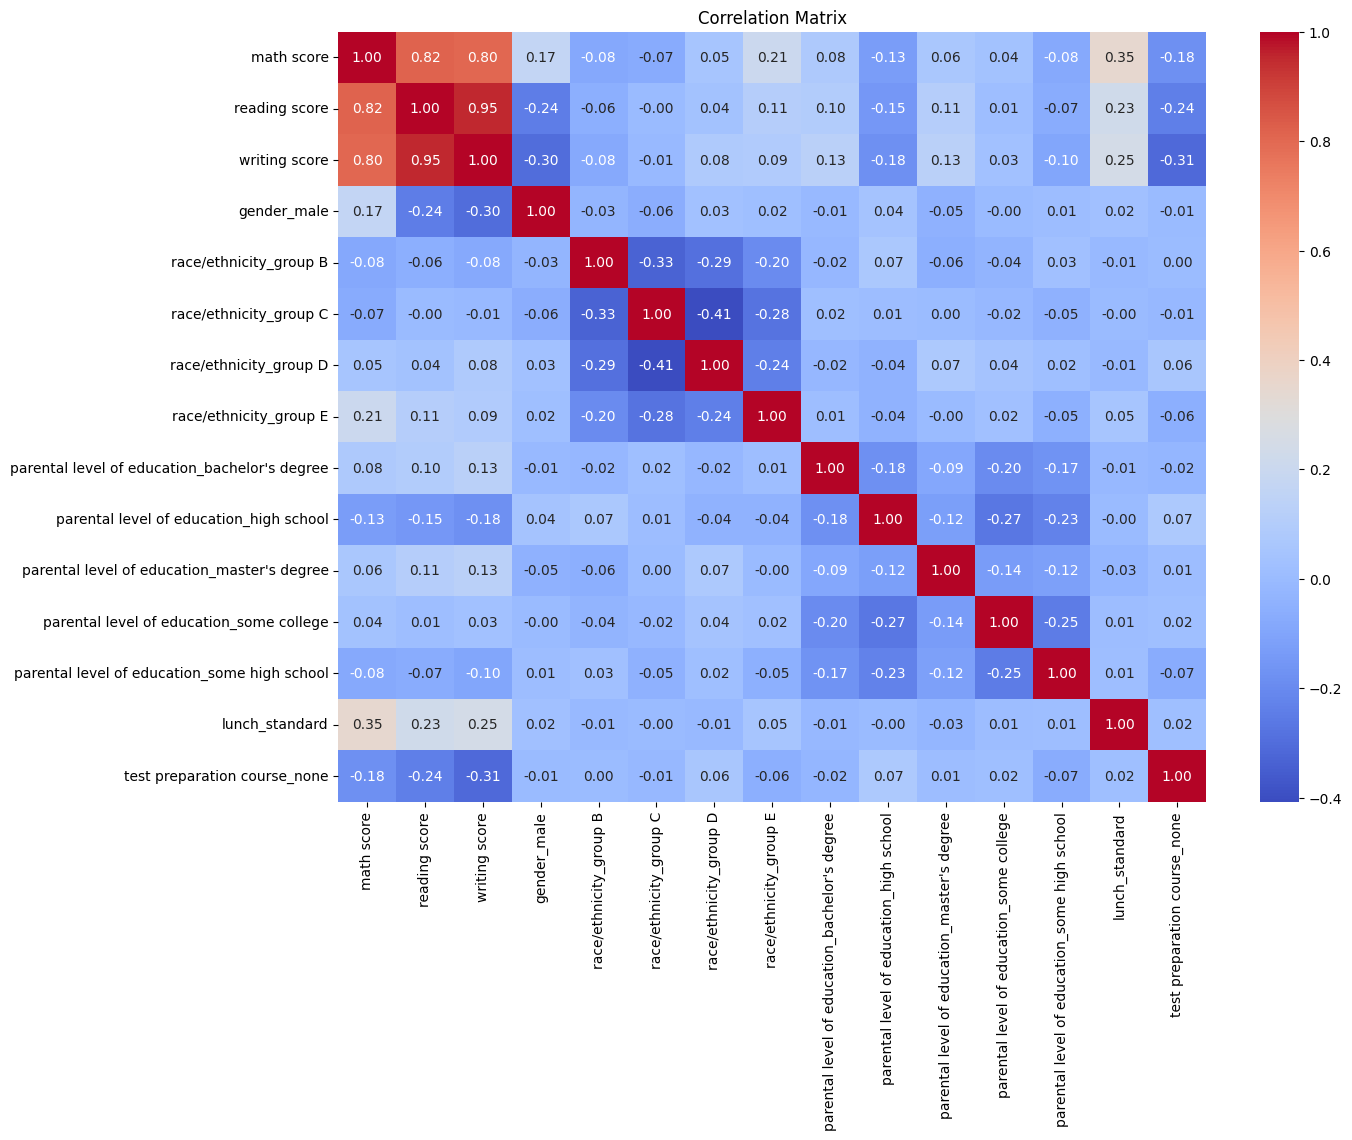

In [ ]:
# Correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
# Features and target
X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score']


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict
y_pred = model.predict(X_test)

In [ ]:
# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print("Model Evaluation Metrics:")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

Model Evaluation Metrics:
R²: 0.880
MAE: 4.21
RMSE: 5.39


In [ ]:
# Group by test preparation course
test_prep_impact = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()
print("\nAverage Scores by Test Preparation Course:\n", test_prep_impact)


Average Scores by Test Preparation Course:
                          math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


In [ ]:
# Group by parental level of education
parent_edu_impact = df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean()
print("\nAverage Scores by Parental Level of Education:\n", parent_edu_impact)


Average Scores by Parental Level of Education:
                              math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


/tmp/ipython-input-41-1817294053.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='parental level of education', y='math score', data=df, ci=None)


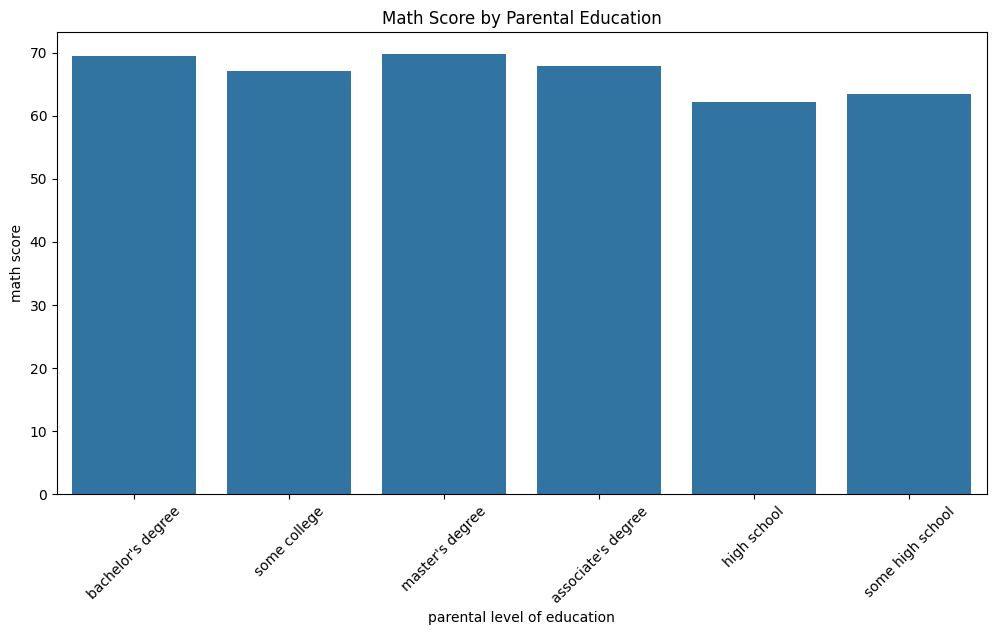

In [ ]:
# Optional: Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='parental level of education', y='math score', data=df, ci=None)
plt.xticks(rotation=45)
plt.title("Math Score by Parental Education")
plt.show()

In [ ]:
# Separate datasets
df_male = df_encoded[df_encoded['gender_male'] == 1]
df_female = df_encoded[df_encoded['gender_male'] == 0]

In [ ]:
# Train models separately
def train_and_evaluate(data, label):
    X = data.drop('math score', axis=1)
    y = data['math score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{label} Model:")
    print(f"R²: {r2_score(y_test, y_pred):.3f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

In [ ]:
train_and_evaluate(df_female, "Female")
train_and_evaluate(df_male, "Male")


Female Model:
R²: 0.900
MAE: 4.42
RMSE: 5.48

Male Model:
R²: 0.852
MAE: 4.54
RMSE: 5.42
